In [6]:
import pandas as pd


## Basic Linear Classifiers for Binary Labelled Data

The goal of this tutorial is to give students a gente introduction to the most basic form of linear binary classification, along with essential notions of information retrieval that are used to determine how good these classifiers are. 

In this first chapter we stay very introductory, not going in any depth before getting a good grasp of the basics.

We are going to import a relatively large dataset containing height and weight data along with biological gender of a relatively large number of individuals

### Loading the dataset

In [7]:
url = "https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv"
df = pd.read_csv(url, error_bad_lines=False)
    
# replacing Male and Female with one and zero

df['Gender'].replace('Female', 0, inplace=True)
df['Gender'].replace('Male', 1, inplace=True)

# reorganising the columns of my dataframe

df = df[['Height', 'Weight', 'Gender']]
df

,Height,Weight,Gender
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1
5,67.253016,152.212156,1
6,68.785081,183.927889,1
7,68.348516,167.971110,1
8,67.018950,175.929440,1
9,63.456494,156.399676,1


The decision surface in a linear classifier is, not surprisingly, a line. Lines have the general equation 0 = Ax + By + C, which can be expressed as a function of y

$ y = mx + b $

I need to define my function in a way that allows me to pass it as a parameter to another function. I do that in the definition of **myf** below.

Then the **get_confusion_element** function gets the candidate decision surface, the parameters, the dataframe and the individual to return wether for that individual the classifier produces a True Positive, True Negative, False Positive or False Negative.



In [25]:
def myf(x): return (18/7)*x - (60/7)

# line equation
# y = m*x + b
# Weight = m*Height + b (m slope, b ind. constant)

# here I am defining a decision boundary that I know is good
# students should play around and maybe write a function that explores
# values of m between 2 and 3 in step size 0.1
# and values of between 5 and 10 also in steps of 0.1

In [26]:
i = 9000
sample_person = df.loc[i]["Height"]
print(f"Gender is {df.loc[i]['Gender']}")
myf(sample_person)

Gender is 0.0


141.92252518397314

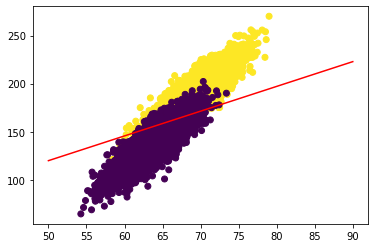

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
plt.scatter(df.Height,df.Weight,c=df.Gender)
x = np.linspace(50,90,1000)
y = myf(x)
plt.plot(x,y,c="red")
plt.draw()

In [61]:
def get_confusion_element(df, function, parameters, individual):
    
    params = []
    for p in parameters[0:-1]:
        params.append(df.loc[individual][p])
    
    xo = df.loc[individual][parameters[0]]
    yo = df.loc[individual][parameters[1]]
    #print('data point', xo, yo)
    yp = function(*params)
    #print('pred point Y', yp)
    resp = df.loc[individual]['Gender']
    if yo >= yp and resp == 1:
        result = 'TP'
    elif yo >= yp and resp == 0:
        result = 'FP'
    elif yo < yp and resp == 0:
        result = 'TN'
    else:
        result = 'FN'
        
    #yp - f(xp) > 0
    return result

And now to get the values of the confusion matrix

In [62]:
def compute_confusion_matrix(df,fn):
    rx = [get_confusion_element(df, fn, ['Height','Weight'], i) for i in range(len(df))]
    confusion_matrix = pd.DataFrame(columns=["Positive","Negative"], index=["Alert","Not Alert"])
    confusion_matrix.loc["Alert","Positive"] = rx.count('TP')
    confusion_matrix.loc["Alert","Negative"] = rx.count('FP')
    confusion_matrix.loc["Not Alert","Positive"] = rx.count('FN')
    confusion_matrix.loc["Not Alert","Negative"] = rx.count('TN')
    return confusion_matrix

In [63]:
def recall(cf_df):
    return cf_df.loc["Alert","Positive"]/(cf_df.loc[:,"Positive"].sum())

def precision(cf_df):
    return cf_df.loc["Alert","Positive"]/(cf_df.loc["Alert",:].sum())

In [48]:
print(f"In this dataset, this model has a precision of {round(precision(confusion_matrix),2)}")
print(f"In this dataset, this model has a recall of {round(recall(confusion_matrix),2)}")

In this dataset, this model has a precision of 0.93
In this dataset, this model has a recall of 0.91


In [69]:
def report(df, fn):
    plt.scatter(df.Height,df.Weight,c=df.Gender)
    x = np.linspace(50,90,1000)
    y = fn(x)
    plt.plot(x,y,c="red")
    plt.draw()
    confusion_matrix = compute_confusion_matrix(df,fn)
    print(confusion_matrix.head())
    print(f"In this dataset, this model has a precision of {round(precision(confusion_matrix),4)}")
    print(f"In this dataset, this model has a recall of {round(recall(confusion_matrix),4)}")                                            
    

           Positive  Negative
Alert          4556       367
Not Alert       444      4633
In this dataset, this model has a precision of 0.93
In this dataset, this model has a recall of 0.91


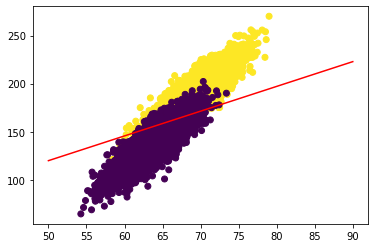

In [59]:
report(df, myf)

           Positive  Negative
Alert          1063         1
Not Alert      3937      4999
In this dataset, this model has a precision of 0.9991
In this dataset, this model has a recall of 0.2126


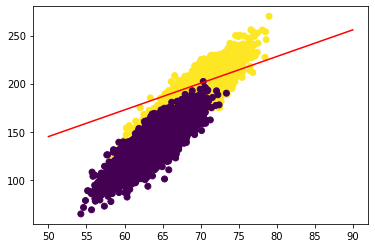

In [70]:
report(df, lambda x: (18/7 + 0.2)*x - (60/7 - 15))